This notebook contains all the code for the modeling part of this project, which is to use previous game data to predict the likelihood of the Dodgers winning and losing their next game. The first step is importing the necessary data from the pickles were saved, which in this case will be the boxscore data. There are 4 models that will be ran, in total:
>* Random Forest
* XGBoost
* Naive Bayes
* K-Nearest Neighbors

# Boxscores

## 2018

In [1]:
import pandas as pd
import pickle
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2000)
with open('Pickles/boxscore_2018.pickle', 'rb') as handle:
    boxscore_2018 = pickle.load(handle)

In [2]:
boxscore_2018

,Opp,W/L_df,R,RA,Win,Loss,D/N,Next_Game,W/L_other
Gm#,,,,,,,,,
1,SFG,L,0,1,Blach,Kershaw,D,2,L
2,SFG,L,0,1,Watson,Jansen,N,3,W
3,SFG,W,5,0,Maeda,Holland,N,4,W
4,SFG,W,9,0,Hill,Stratton,N,5,NaN
6,ARI,L,1,6,Godley,Kershaw,N,7,L
7,ARI,L,0,3,Corbin,Wood,D,8,NaN
9,SFG,W,2,1,Fields,Johnson,D,10,W
10,OAK,W,4,0,Ryu,Manaea,N,11,L
11,OAK,L,6,16,Mengden,Wood,N,12,L


## 2019

In [3]:
with open('Pickles/boxscore_2019.pickle', 'rb') as handle:
    boxscore_2019 = pickle.load(handle)

In [4]:
boxscore_2019

,Opp,W/L_df,R,RA,Win,Loss,D/N,Next_Game,W/L_other
Gm#,,,,,,,,,
1,ARI,W,12,5,Ryu,Greinke,D,2,L
2,ARI,L,4,5,Andriese,Garcia,N,3,W
3,ARI,W,18,5,Maeda,Godley,N,4,W
4,ARI,W,8,7,Floro,Hirano,D,5,L
5,SFG,L,2,4,Gott,Kelly,N,6,W
6,SFG,W,6,5,Ryu,Bumgarner,N,7,W
7,SFG,W,5,3,Alexander,Moronta,N,8,W
8,COL,W,10,6,Maeda,Anderson,D,9,W
9,COL,W,7,2,Buehler,Gray,N,10,W


As mentioned previously, since the 2020 season is currently ongoing, the data will need to be updated often, so that all the information is as current as possible.

## 2020

In [5]:
boxscore = pd.read_html('https://www.baseball-reference.com/teams/LAD/2020-schedule-scores.shtml')
box_score = boxscore[0]
box_score = box_score.set_index('Gm#')
box_score.drop(['Unnamed: 2', 'Unnamed: 4', 'Inn', 'Rank', 'Time', 'Attendance', 'Streak', 'Orig. Scheduled', 
                'Save'], axis=1, inplace=True)
box_score.drop(['Gm#'], axis=0, inplace=True)
box_score = box_score[0:58]
next_game = range(2,box_score.shape[0]+2)
box_score['Next_Game'] = next_game

box_score = box_score.loc[box_score['W/L'] != 'W-wo']
box_score = box_score.loc[box_score['W/L'] != 'L-wo']

box_score

,Date,Tm,Opp,W/L,R,RA,W-L,GB,Win,Loss,D/N,Next_Game
Gm#,,,,,,,,,,,,
1,"Thursday, Jul 23",LAD,SFG,W,8,1,1-0,up 0.5,Kolarek,Rogers,N,2
2,"Friday, Jul 24",LAD,SFG,W,9,1,2-0,up 0.5,Stripling,Anderson,N,3
3,"Saturday, Jul 25",LAD,SFG,L,4,5,2-1,0.5,Baragar,Wood,D,4
4,"Sunday, Jul 26",LAD,SFG,L,1,3,2-2,0.5,Peralta,Graterol,N,5
5,"Tuesday, Jul 28",LAD,HOU,W,5,2,3-2,1.0,Kolarek,Valdez,N,6
6,"Wednesday, Jul 29",LAD,HOU,W,4,2,4-2,0.5,Santana,Sneed,N,7
7,"Thursday, Jul 30",LAD,ARI,W,6,3,5-2,Tied,Stripling,Ray,N,8
8,"Friday, Jul 31",LAD,ARI,L,3,5,5-3,1.0,Rondon,Treinen,N,9
9,"Saturday, Aug 1",LAD,ARI,W,11,2,6-3,Tied,Urias,Weaver,N,10


In [6]:
next_game_outcome_2020 = box_score.drop(['Date', 'Tm', 'Opp', 'R', 'RA', 'W-L', 'GB', 'Win', 'Loss', 'D/N', 
                                         'Next_Game'], axis=1)
next_game_outcome_2020 = next_game_outcome_2020.loc[next_game_outcome_2020['W/L'] != 'W-wo']
next_game_outcome_2020 = next_game_outcome_2020.loc[next_game_outcome_2020['W/L'] != 'L-wo']
next_game_outcome_2020.index = next_game_outcome_2020.index.astype('int64')
next_game_outcome_2020

,W/L
Gm#,
1,W
2,W
3,L
4,L
5,W
6,W
7,W
8,L
9,W


In [7]:
boxscore_2020 = box_score.join(next_game_outcome_2020, on='Next_Game', lsuffix='_df', rsuffix='_other')
boxscore_2020 = boxscore_2020.drop(['Date', 'Tm', 'W-L', 'GB'], axis=1)
boxscore_2020

,Opp,W/L_df,R,RA,Win,Loss,D/N,Next_Game,W/L_other
Gm#,,,,,,,,,
1,SFG,W,8,1,Kolarek,Rogers,N,2,W
2,SFG,W,9,1,Stripling,Anderson,N,3,L
3,SFG,L,4,5,Baragar,Wood,D,4,L
4,SFG,L,1,3,Peralta,Graterol,N,5,W
5,HOU,W,5,2,Kolarek,Valdez,N,6,W
6,HOU,W,4,2,Santana,Sneed,N,7,W
7,ARI,W,6,3,Stripling,Ray,N,8,L
8,ARI,L,3,5,Rondon,Treinen,N,9,W
9,ARI,W,11,2,Urias,Weaver,N,10,W


In [8]:
all_boxscores = [boxscore_2020, boxscore_2019, boxscore_2018]
boxscore_df = pd.concat(all_boxscores)
boxscore_df

,Opp,W/L_df,R,RA,Win,Loss,D/N,Next_Game,W/L_other
Gm#,,,,,,,,,
1,SFG,W,8,1,Kolarek,Rogers,N,2,W
2,SFG,W,9,1,Stripling,Anderson,N,3,L
3,SFG,L,4,5,Baragar,Wood,D,4,L
4,SFG,L,1,3,Peralta,Graterol,N,5,W
5,HOU,W,5,2,Kolarek,Valdez,N,6,W
6,HOU,W,4,2,Santana,Sneed,N,7,W
7,ARI,W,6,3,Stripling,Ray,N,8,L
8,ARI,L,3,5,Rondon,Treinen,N,9,W
9,ARI,W,11,2,Urias,Weaver,N,10,W


# Predicting Likelihood of Outcome for Next Game

## Data Preprocessing

Fortunately, the data that I obtained was very clean, and doesn't require a ton of cleaning and preprocessing. However, there was a series of steps that still needed to be taken in order to provide the best data possible for modeling. These steps include:
>* Using the .info() method to check datatypes and changing any as needed
* Using the .isna().sum() method to check and resolve null values
* Checking the value counts to see if there is any class imbalance.
* Creating dummy variables
* Dropping all unnecessary columns

In [9]:
boxscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 1 to 163
Data columns (total 9 columns):
Opp          349 non-null object
W/L_df       349 non-null object
R            349 non-null object
RA           349 non-null object
Win          349 non-null object
Loss         349 non-null object
D/N          349 non-null object
Next_Game    349 non-null int64
W/L_other    317 non-null object
dtypes: int64(1), object(8)
memory usage: 27.3+ KB


The only problem datatypes here are 'R' and 'RA', which stand for runs scored and runs allowed, respectively. They will be converted into integers.

In [10]:
boxscore_df.isna().sum()

Opp           0
W/L_df        0
R             0
RA            0
Win           0
Loss          0
D/N           0
Next_Game     0
W/L_other    32
dtype: int64

The reason that there are null values is because of the phenomenon of the "Walk-Off" win. The MLB defines a walk-off win as "...when the home team takes the lead in the bottom of the ninth or extra innings. Because the visiting team will not get another turn at-bat, the game ends immediately, with the home team victorious." When obtaining this data, the data classified walk-off wins and losses into their own separate categories. And since I don't think using a multiclass model makes a ton of sense in this instance because of the small number of occurrences, I decided to drop the instances in which they occur... for now. If model performance is not great, then I will likely reengineer the walk-off wins as regular wins, so that there will be more data available in the target group.

In [11]:
boxscore_df['R'] = boxscore_df['R'].astype(int)
boxscore_df['RA'] = boxscore_df['RA'].astype(int)

Use .info() again to confirm successful datatype change.

In [12]:
boxscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 1 to 163
Data columns (total 9 columns):
Opp          349 non-null object
W/L_df       349 non-null object
R            349 non-null int64
RA           349 non-null int64
Win          349 non-null object
Loss         349 non-null object
D/N          349 non-null object
Next_Game    349 non-null int64
W/L_other    317 non-null object
dtypes: int64(3), object(6)
memory usage: 27.3+ KB


Check value counts for potential class imbalance.

In [13]:
boxscore_df['W/L_df'].value_counts(normalize=True)

W    0.627507
L    0.372493
Name: W/L_df, dtype: float64

There is a little bit of a class imbalance here (which means the Dodgers have been good!)

Although having the insights of who the winning and losing pitchers are can have tremendous value, I will be dropping the 'Loss' column for now because I don't want to risk overfitting due to the small number of values. As more data is obtained, then the losing pitcher can be considered.

In [14]:
boxscore_df.drop('Loss', axis=1, inplace=True)

The next two steps involve creating dummy variables and dropping all new columns that are unnecessary.

In [15]:
boxscore_final = pd.get_dummies(boxscore_df)
boxscore_final.drop(['W/L_other_L', 'W/L_df_L', 'W/L_df_W', 'Next_Game'], axis=1, inplace=True)
boxscore_final.head()

,R,RA,Opp_ARI,Opp_ATL,Opp_BAL,Opp_BOS,Opp_CHC,Opp_CIN,Opp_COL,Opp_HOU,Opp_LAA,Opp_MIA,Opp_MIL,Opp_NYM,Opp_NYY,Opp_OAK,Opp_PHI,Opp_PIT,Opp_SDP,Opp_SEA,Opp_SFG,Opp_STL,Opp_TBR,Opp_TEX,Opp_TOR,Opp_WSN,Win_Albers,Win_Alexander,Win_Almonte,Win_Alvarez,Win_Anderson,Win_Andriese,Win_Armstrong,Win_Arrieta,Win_Baez,Win_Bailey,Win_Baragar,Win_Barria,Win_Beede,Win_Blach,Win_Black,Win_Brach,Win_Bracho,Win_Bradley,Win_Brault,Win_Brebbia,Win_Brice,Win_Buehler,Win_Burnes,Win_Buttrey,...,Win_Miley,Win_Moronta,Win_Newcomb,Win_Nola,Win_Paddack,Win_Pagan,Win_Paredes,Win_Paxton,Win_Peacock,Win_Pena,Win_Peralta,Win_Poche,Win_Quantrill,Win_Quintana,Win_Ray,Win_Richards,Win_Rodriguez,Win_Rondon,Win_Ryan,Win_Ryu,Win_Sadler,Win_Samardzija,Win_Sanchez,Win_Santana,Win_Scherzer,Win_Senzatela,Win_Smith,Win_Stammen,Win_Steckenrider,Win_Strasburg,Win_Stratton,Win_Stripling,Win_Suarez,Win_Swarzak,Win_Treinen,Win_Urias,Win_Verlander,Win_Wainwright,Win_Walker,Win_Watson,Win_Weaver,Win_Wheeler,Win_White,Win_Wingenter,Win_Wittgren,Win_Wood,Win_Yates,D/N_D,D/N_N,W/L_other_W
Gm#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
5,5,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


Import all necessary packages.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
plt.style.use('seaborn-talk')

## Functions to Display Model Results

Below are a couple of functions that will be used to display the results of each model's performance.

In [17]:
def plot_features(clf, top_n = 20, figsize = (10,10)):
    
    """Function to plot the feature importances for an ensemble method.
    
    Parameters:
    
    clf - The name of your model.
    
    top_n - The number of features you want displayed.
    
    figsize - Determines how large or small your figure is.
    
    Output: The output will result in a horizontal bar graph that displays what the most important features were
    when your machine ran your model."""
    
    df_features = pd.Series(clf.feature_importances_, index = X_train.columns)
    df_features.sort_values(ascending=True).tail(top_n).plot(kind='barh',figsize=figsize)
    
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('ML Feature Importance')
    plt.show()
    
    return df_features

In [18]:
import sklearn.metrics as metrics

def model_performance(y_true, pred, X_true, clf):
    
    """Function to create a confusion matrix & ROC-AUC graph to display the validity & reliability if your model.
    
    Parameters:
    
    y_true - y-test data.
    
    pred - prediction data.
    
    X_true - X-test data.
    
    clf - The name of your model.
    
    Output - This will create & plot a confusion matrix in order to check the precision, recall, and F1-score
    for your model. The confusion matrix plot displays the recall and is in the first subplot. It will also 
    calculate the ROC-AUC score and display the curve in a graph in the second subplot."""
    
    print(metrics.classification_report(y_true, pred))
    #Create Confusion Matrix
    fig, ax = plt.subplots(figsize=(11,5), ncols=2)
    metrics.plot_confusion_matrix(clf, X_true, y_true, cmap="Blues", normalize='true',ax=ax[0])
    ax[0].set(title='Confusion Matrix')
    #Calculate ROC-AUC Score
    y_score = clf.predict_proba(X_true)[:, 1]
    false_positive, true_positive, thresholds = metrics.roc_curve(y_true, y_score)   
    roc_auc = round(metrics.auc(false_positive, true_positive), 2)
    #Plot ROC-AUC curve
    ax[1].plot(false_positive, true_positive, color='red', label = f'Area Under Curve = {roc_auc}')   
    ax[1].plot([0,1], [0,1], ls='--')  
    ax[1].legend() 
    ax[1].grid()  
    ax[1].set(ylabel='True Positive Rate', xlabel='False Positive Rate',
              title='ROC Curve')
    
    plt.tight_layout() 
    plt.show()
    
    try: 
        df_best_features = plot_features(clf)
        
    except:
        df_best_features = None

Everything is now ready for running the models. They will all follow the same process:
>* Classify target variable as y
* Perform train-test split and determine size of testing data
* Redesignate X_train and y_train using SMOTE
* GridSearch parameters, if applicable
* Run model
* Display results

## Model 1 - Random Forest

In [19]:
y = boxscore_final['W/L_other_W']

X = boxscore_final.drop('W/L_other_W', axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y)

Initially for the random forest, I was using the 'class_weight' parameter to try and sort the imbalance. However, after some trial and error I decided that it would be necessary to oversample my target using SMOTE in order to achieve optimal results. I performed this step for all models.

In [21]:
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE().fit_sample(X_train, y_train)

print(pd.Series(y_train).value_counts()) 

1    158
0    158
Name: W/L_other_W, dtype: int64


In [22]:
forest = RandomForestClassifier() 

grid = {'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [0.25, 0.50, 0.75],
        'bootstrap': [True, False]}

gridsearch = GridSearchCV(forest, param_grid = grid)

gridsearch.fit(X_train, y_train)

gridsearch.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_split': 0.25}

              precision    recall  f1-score   support

           0       0.48      0.47      0.47        30
           1       0.61      0.62      0.62        40

    accuracy                           0.56        70
   macro avg       0.55      0.55      0.55        70
weighted avg       0.56      0.56      0.56        70



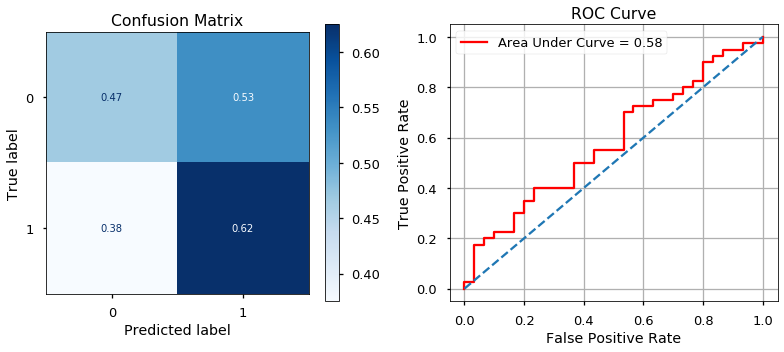

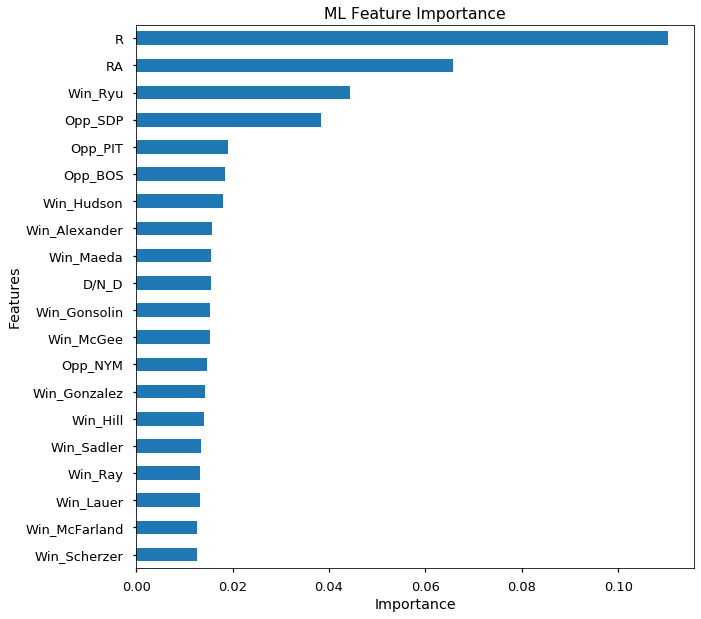

In [23]:
forest = RandomForestClassifier(criterion='entropy', min_samples_split=0.25)

forest.fit(X_train, y_train)

pred = forest.predict(X_test)
model_performance(y_test,pred,X_test,forest)

In [25]:
feature_corr_RF = boxscore_final[['W/L_other_W', 'R', 'RA', 'Win_Ryu', 'Opp_SDP', 'Opp_PIT',
                                  'Opp_BOS', 'Win_Hudson', 'Win_Alexander', 'Win_Maeda', 'D/N_D']].corr()

In [26]:
feature_corr_RF.corr().style.background_gradient(cmap='Blues')

,W/L_other_W,R,RA,Win_Ryu,Opp_SDP,Opp_PIT,Opp_BOS,Win_Hudson,Win_Alexander,Win_Maeda,D/N_D
W/L_other_W,1,-0.358155,-0.140762,0.0609123,0.0114757,-0.0315702,0.0282027,0.0597892,-0.00534737,-0.0416948,-0.121684
R,-0.358155,1,-0.047537,0.0531299,-0.163367,0.157376,-0.0869995,-0.212614,-0.0809197,0.0199649,-0.0113711
RA,-0.140762,-0.047537,1,-0.427042,-0.261238,-0.0526482,0.0308336,-0.039171,-0.0924017,-0.299434,-0.163685
Win_Ryu,0.0609123,0.0531299,-0.427042,1,0.0204352,0.0726083,-0.148296,-0.147876,-0.160922,-0.170565,0.0551334
Opp_SDP,0.0114757,-0.163367,-0.261238,0.0204352,1,-0.246826,-0.14822,-0.167536,0.0870175,-0.0096351,-0.26221
Opp_PIT,-0.0315702,0.157376,-0.0526482,0.0726083,-0.246826,1,-0.140606,-0.157587,-0.18223,-0.0412266,-0.107261
Opp_BOS,0.0282027,-0.0869995,0.0308336,-0.148296,-0.14822,-0.140606,1,-0.106844,-0.12473,-0.129498,-0.213972
Win_Hudson,0.0597892,-0.212614,-0.039171,-0.147876,-0.167536,-0.157587,-0.106844,1,-0.129155,-0.136517,0.0301496
Win_Alexander,-0.00534737,-0.0809197,-0.0924017,-0.160922,0.0870175,-0.18223,-0.12473,-0.129155,1,-0.148558,-0.0669948
Win_Maeda,-0.0416948,0.0199649,-0.299434,-0.170565,-0.0096351,-0.0412266,-0.129498,-0.136517,-0.148558,1,-0.0648313


## Model 2 - XGBoost

In [27]:
import xgboost as xgb

y = boxscore_final['W/L_other_W']

X = boxscore_final.drop('W/L_other_W', axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y)

In [29]:
X_train, y_train = SMOTE().fit_sample(X_train, y_train)

print(pd.Series(y_train).value_counts())

1    158
0    158
Name: W/L_other_W, dtype: int64


In [30]:
boost = xgb.XGBClassifier() 

grid = {'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 6, 10],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.25, 0.5, 0.75, 1],
        'n_estimators': [100, 200, 300, 400]}

gridsearch = GridSearchCV(boost, param_grid=grid)

gridsearch.fit(X_train, y_train)

gridsearch.best_params_

{'learning_rate': 0.001,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 1}

              precision    recall  f1-score   support

           0       0.31      0.40      0.35        30
           1       0.42      0.33      0.37        40

    accuracy                           0.36        70
   macro avg       0.36      0.36      0.36        70
weighted avg       0.37      0.36      0.36        70



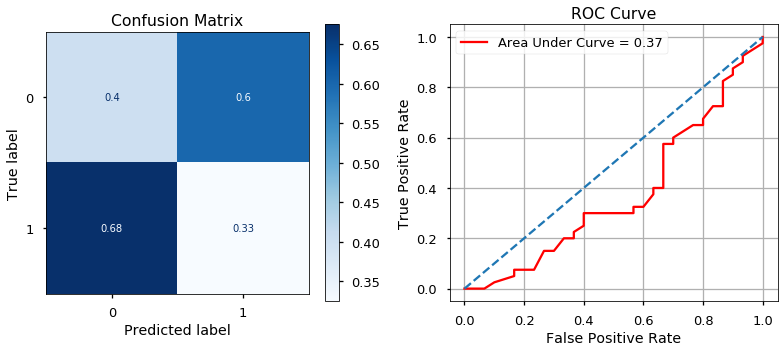

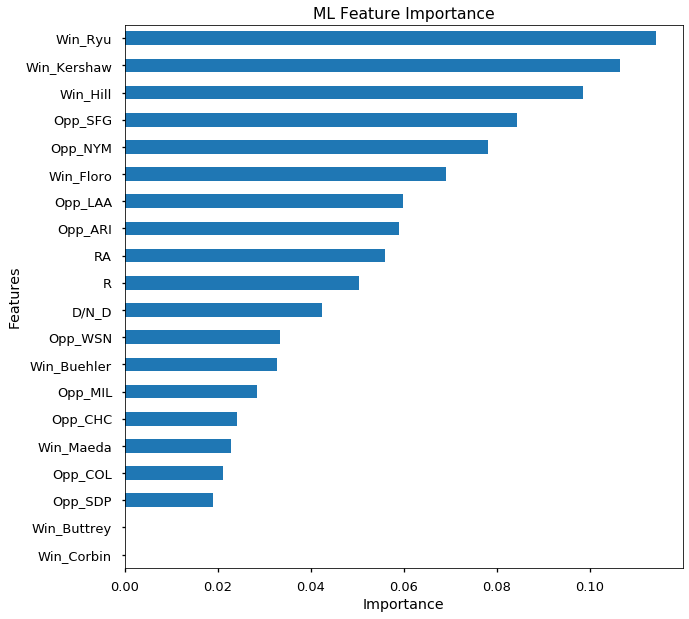

In [31]:
boost = xgb.XGBClassifier(learning_rate= 0.001, max_depth=10, n_estimators=200) 

boost.fit(X_train, y_train)

pred = boost.predict(X_test)
model_performance(y_test,pred,X_test,boost) 

In [33]:
feature_corr_XG = boxscore_final[['W/L_other_W', 'Win_Ryu', 'Win_Kershaw', 'Win_Hill', 'Opp_SFG',
                                  'Opp_NYM', 'Win_Floro', 'Opp_LAA', 'Opp_ARI', 'RA',
                                  'R']].corr()
feature_corr_XG.corr().style.background_gradient(cmap='Blues')

,W/L_other_W,Win_Ryu,Win_Kershaw,Win_Hill,Opp_SFG,Opp_NYM,Win_Floro,Opp_LAA,Opp_ARI,RA,R
W/L_other_W,1,0.139001,-0.267533,-0.280108,-0.00506492,-0.0116928,-0.0217964,-0.0182909,-0.0689837,-0.0640216,-0.328326
Win_Ryu,0.139001,1,-0.165888,-0.129227,0.0109356,-0.0390796,-0.139681,-0.154257,-0.0349647,-0.374472,0.0312124
Win_Kershaw,-0.267533,-0.165888,1,-0.111703,-0.146524,0.0323846,-0.154567,-0.0655799,-0.0443171,-0.286172,0.32927
Win_Hill,-0.280108,-0.129227,-0.111703,1,0.0721935,0.0018814,-0.126558,-0.137551,-0.232699,-0.2297,0.264559
Opp_SFG,-0.00506492,0.0109356,-0.146524,0.0721935,1,-0.185402,0.0418144,-0.17375,-0.315587,-0.347252,-0.160213
Opp_NYM,-0.0116928,-0.0390796,0.0323846,0.0018814,-0.185402,1,-0.16791,-0.127633,-0.200637,-0.029756,-0.117985
Win_Floro,-0.0217964,-0.139681,-0.154567,-0.126558,0.0418144,-0.16791,1,-0.136565,0.0319795,-0.0682285,0.000806575
Opp_LAA,-0.0182909,-0.154257,-0.0655799,-0.137551,-0.17375,-0.127633,-0.136565,1,-0.177677,0.014267,-0.187296
Opp_ARI,-0.0689837,-0.0349647,-0.0443171,-0.232699,-0.315587,-0.200637,0.0319795,-0.177677,1,0.145214,-0.16457
RA,-0.0640216,-0.374472,-0.286172,-0.2297,-0.347252,-0.029756,-0.0682285,0.014267,0.145214,1,-0.0820354


## Model 3 - Naive Bayes

In [34]:
y = boxscore_final['W/L_other_W']

X = boxscore_final.drop('W/L_other_W', axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y)

In [36]:
X_train, y_train = SMOTE().fit_sample(X_train, y_train)

print(pd.Series(y_train).value_counts())

1    158
0    158
Name: W/L_other_W, dtype: int64


              precision    recall  f1-score   support

           0       0.47      0.70      0.56        30
           1       0.64      0.40      0.49        40

    accuracy                           0.53        70
   macro avg       0.55      0.55      0.53        70
weighted avg       0.57      0.53      0.52        70



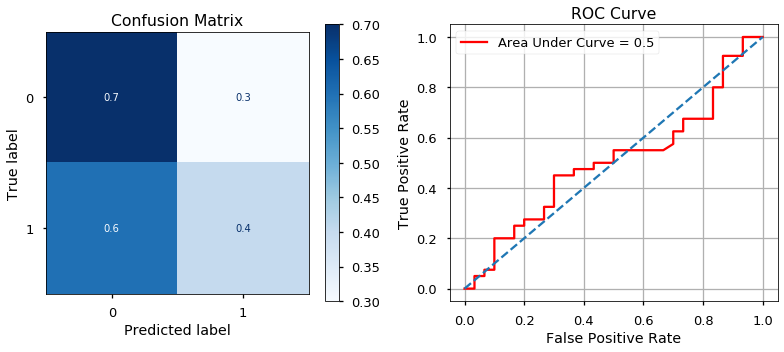

In [37]:
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB()
bayes.fit(X_train, y_train)
pred = bayes.predict(X_test)
model_performance(y_test,pred,X_test,bayes)

## Model 4 - K-Nearest Neighbors

In [38]:
y = boxscore_final['W/L_other_W']

X = boxscore_final.drop('W/L_other_W', axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y)

In [40]:
X_train, y_train = SMOTE().fit_sample(X_train, y_train)

print(pd.Series(y_train).value_counts())

1    158
0    158
Name: W/L_other_W, dtype: int64


In [41]:
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))

In [42]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 15


              precision    recall  f1-score   support

           0       0.46      0.87      0.60        30
           1       0.71      0.25      0.37        40

    accuracy                           0.51        70
   macro avg       0.59      0.56      0.49        70
weighted avg       0.61      0.51      0.47        70



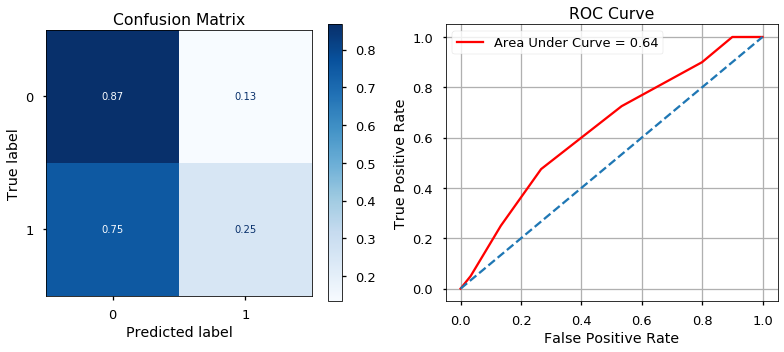

In [43]:
neighbor = KNeighborsClassifier(n_neighbors=15)
neighbor.fit(X_train, y_train)
pred = neighbor.predict(X_test)
model_performance(y_test,pred,X_test,neighbor)

Update 9/24/20 - To date, the models are still inconclusive. There are still inconsistencies in the recall for each model. However, a new finding is that now the models are consistently better at predicting the likelihood of losses as opposed to wins, which is interesting. I included the feature correlation table for both of the ensemble methods, but the positive or negative influences still don't make a lot of sense. For example, in the XGBoost table, Scott Alexander and Hyun-Jin Ryu (no longer on the team - left to Toronto in free agency) being credited with wins were positive features when predicting wins, however Clayton Kershaw & Ross Stripling (no longer on the team - traded to Toronto at the deadline) being credited with wins were considered negative features - even though all four pitchers were on the Dodgers for of the majority of the time between 2018-present. The performance is improving slowly, but there is still work to be done.

Update 9/26/20 - Results are still quite all over the place. However, more features are starting to become prevalent in the XGBoost model, which will help make these findings more insightful. KNN has predicted losses at its highest recall to date (87%).